## **MODELO**

Instalar y cargar librerias

In [248]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest
from numpy import set_printoptions
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.kernel_approximation import AdditiveChi2Sampler

Carga de datos

In [86]:
df= pd.read_csv('./data/df.csv')

Tratamiento nulos

In [87]:
# Se remplaza los nulos por el numero cero, ya que representan los empleados que no han renunciado
df  = df.fillna(0)

Tratamiento de variables

In [89]:
#se escalan los datos de la variable edad 
Scaler = MinMaxScaler()
df[['age']] = Scaler.fit_transform(df[['age']])

In [90]:
#Se remplaza las categorias string por caregorias numericas

#businesstravel
dic = {
    'travel_rarely' : 2,
    'travel_frequently' : 3,
    'non-travel' : 1,
    
}

#department
dic1 = {
    'sales' : 1,
    'research & development' : 2,
    'human resources' : 3,
    'technical degree' : 4,
    'human resources'   :5
}

#educationfield
dic2 = {
    'life sciences' : 1,
    'other' : 2,
    'medical' : 3,
    'marketing': 4,
    'technical degree': 5,
    'human resources': 6
    
}

#resignationreason
dic3 = {
    'others' : 1,
    'stress' : 2,
    'salary' : 3,
    
}

#Gender
dic4 = {
    'female' : 0,
    'male' : 1,
    
    
}

#maritalstatus
dic5 = {
    'married' : 1,
    'single' : 2,
    'divorced': 3,
    
    
}

In [91]:
#Remplazo 
df.businesstravel = df.businesstravel.replace(dic)
df.department = df.department.replace(dic1)
df.educationfield = df.educationfield.replace(dic2)
df.resignationreason = df.resignationreason.replace(dic3)
df.gender = df.gender.replace(dic4)
df.maritalstatus = df.maritalstatus.replace(dic5)
df.retirementtype= df.retirementtype.replace("resignation",1)

In [92]:
lencoder = LabelEncoder()
lencoder.fit(df.jobrole.unique())
df['jobrole'] = lencoder.transform(df.jobrole.values)

In [93]:
# Se eliminan algunas columnas

df=df.drop(['retirementdate','resignationreason'], axis=1)

### **Future selection**

In [95]:
df.retirementtype.unique()

array([0, 1], dtype=int64)

In [96]:
target = ['retirementtype']
X = df.iloc[:,~df.columns.isin(target)].values
y = df.retirementtype

***Kbest***

In [158]:
#crear un modelo de selección
est_prueba = SelectKBest(score_func=f_classif, k=15)
est_ajustado = est_prueba.fit(X, y)

#Muestro el desempeño de los features basado en el valoir F
set_printoptions(precision=10)
print(est_ajustado.scores_)
features = est_ajustado.transform(X)
print(features)

[5.1782758734e-02 3.6101655573e+01 4.4628770423e+01 1.8454801928e+01
 9.6014335853e+01 6.7195449834e+01 2.5661221056e+01 1.2143257614e-01
 1.1086134055e+00 2.1515347053e-01 3.4463812293e-01 3.9762219137e-01
 3.3143183480e+00 6.3770694601e-01 2.0526564143e+00 1.0790552814e+01
 2.7912218522e+00 3.7213334071e-02 1.1836916784e+02 1.3000500838e+01
 7.6788034750e+01 4.4169649710e+00 9.8142283032e+01 1.1560089200e+00
 1.4360903333e+00]
[[ 3.  4.  2. ...  1.  0.  0.]
 [ 3.  2.  4. ...  5.  1.  4.]
 [ 2.  2.  1. ...  5.  0.  3.]
 ...
 [ 1.  3.  3. ...  4.  1.  2.]
 [ 4.  1.  3. ...  9.  7.  8.]
 [ 1.  3.  3. ... 21.  3.  9.]]


In [159]:
dicscore = {df.columns[i]:est_ajustado.scores_[i] for i in range(len(df.columns[:-1]))
  
}
sorted(dicscore.items(), key=lambda x:x[1], reverse=True)

[('totalworkingyears', 118.36916783518325),
 ('yearswithcurrmanager', 98.14228303152558),
 ('age', 96.01433585287093),
 ('yearsatcompany', 76.78803474964909),
 ('businesstravel', 67.1954498338961),
 ('jobsatisfaction', 44.62877042344758),
 ('environmentsatisfaction', 36.10165557342693),
 ('department', 25.661221056403715),
 ('worklifebalance', 18.454801928098494),
 ('trainingtimeslastyear', 13.000500837500974),
 ('numcompaniesworked', 10.790552814261668),
 ('yearssincelastpromotion', 4.4169649710091905),
 ('jobrole', 3.314318348041877),
 ('percentsalaryhike', 2.7912218521850867),
 ('monthlyincome', 2.0526564142582044),
 ('performancerating', 1.436090333283191),
 ('jobinvolvement', 1.1560089199834365),
 ('education', 1.1086134055069847),
 ('maritalstatus', 0.6377069460115579),
 ('joblevel', 0.3976221913696033),
 ('gender', 0.3446381229306226),
 ('educationfield', 0.21515347052514266),
 ('distancefromhome', 0.12143257614305691),
 ('employeeid', 0.051782758734195),
 ('stockoptionlevel', 0

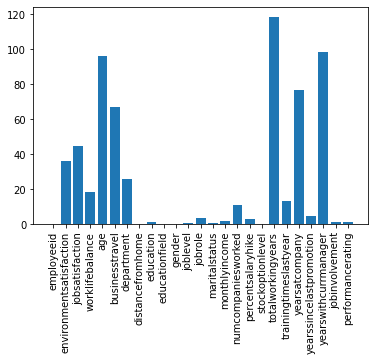

In [155]:
#Se procede a realizar una grafica para visualizar el numero de features a seleccionar 
pesos = dicscore.values()
valores = range(len(pesos))
plt.bar(x=valores,height=pesos)
plt.xticks(valores, dicscore.keys(), rotation = 90)
plt.show()


Los features seleccionados por el metodo Kbest son: ('totalworkingyears', 118.36916783518325),
 ('yearswithcurrmanager', 98.14228303152558),
 ('age', 96.01433585287093),
 ('yearsatcompany', 76.78803474964909),
 ('businesstravel', 67.1954498338961),
 ('jobsatisfaction', 44.62877042344758),
 ('environmentsatisfaction', 36.10165557342693),
 ('department', 25.661221056403715),
 ('worklifebalance', 18.454801928098494),


**Recursive Feature Elimination**

In [161]:
modelo = LogisticRegression(solver='liblinear')
est_rfe = RFE(modelo, n_features_to_select=15)
est_ajustado = est_rfe.fit(X,y)

print(est_ajustado.n_features_)
print(est_ajustado.support_)
print(est_ajustado.ranking_)

15
[False  True  True  True  True  True  True False  True False False  True
 False False False  True False False  True  True False  True  True  True
  True]
[10  1  1  1  1  1  1  9  1  6  3  1  5  2 11  1  8  4  1  1  7  1  1  1
  1]


In [162]:
dicscore1 = [df.columns[i] for i in range(len(df.columns[:-1])) if est_ajustado.support_[i]==True]
dicscore1
#Los features seleccionados por el metodo Recursive Feature Elimination son:

['environmentsatisfaction',
 'jobsatisfaction',
 'worklifebalance',
 'age',
 'businesstravel',
 'department',
 'education',
 'joblevel',
 'numcompaniesworked',
 'totalworkingyears',
 'trainingtimeslastyear',
 'yearssincelastpromotion',
 'yearswithcurrmanager',
 'jobinvolvement',
 'performancerating']

Al realizar la comparación entre los dos metodos, se descarta la variable yearsatcompany.

df con los features seleccionados

In [179]:
df1 = df[['totalworkingyears',
 'yearswithcurrmanager',
 'age', 'businesstravel',
 'jobsatisfaction',
 'environmentsatisfaction',
 'department','worklifebalance','retirementtype']]

df1.rename(columns={'retirementtype':'retired'},inplace=True)

C:\Users\Daniela\AppData\Local\Temp\ipykernel_7984\1323628318.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.rename(columns={'retirementtype':'retired'},inplace=True)


Guardar df

In [181]:
df1.to_csv('./data/df1.csv', index=False)

Actualizar X

In [182]:
target = ['retired']
X = df1.iloc[:,~df1.columns.isin(target)].values
y = df1[target].values

MODELOS

In [239]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

Se realiza balanceo de X_train y y_train

In [240]:
os =  RandomOverSampler(sampling_strategy=0.5)
X_over, y_over = os.fit_resample(X_train, y_train)

SGDclassifier

In [245]:
# Se utilizo como modelo supervisado SGD y como parametro loss "perceptron"
modelo = SGDClassifier(loss="perceptron", penalty="l2", max_iter=500)
modelo.fit(X_train, y_train)

c:\Users\Daniela\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDClassifier(loss='perceptron', max_iter=500)

Score del modelo

In [247]:
modelo.score(X_test, y_test)

0.8594470046082949

In [243]:
# Se utilizo como modelo supervisado SGD y como parametro loss "huber"
modelo = SGDClassifier(loss="huber", penalty="l2", max_iter=500)
modelo.fit(X_train, y_train)

c:\Users\Daniela\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDClassifier(loss='huber', max_iter=500)

Score del modelo

In [244]:
modelo.score(X_test, y_test)

0.8533026113671275

Kernel aproximation

In [249]:
# se utilizo como modelo supervisado categorico kernel approximation 

chi2sampler = AdditiveChi2Sampler()
X_transformed = chi2sampler.fit_transform(X_train, y_train)
modelo = SGDClassifier(max_iter=250, random_state=0, tol=1e-3)
modelo.fit(X_transformed, y_train)

c:\Users\Daniela\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDClassifier(max_iter=250, random_state=0)

Score del modelo

In [250]:
X_test_transformed = chi2sampler.fit_transform(X_test, y_test)
modelo.score(X_test_transformed,y_test)

0.8594470046082949